In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import pyplot

In [2]:
#ทำการ Load Dataset fashion_mnist
data = tf.keras.datasets.fashion_mnist

In [3]:
#กำหนด Train_images, Train_labels Test_images, Test_labels เพื่อนำข้อมูลจาก Dataset ไปใส่
(training_images, training_labels), (test_images, test_labels) = data.load_data()

4431872/4422102 [==============================] - 3s 1us/step


In [4]:
#ทำเป็น Gray scale ให้อยู่ในช่วง 0-1 วิธีการ normalization ช่วยให้ model train ไวขึ้น และ มีประสิทธิภาพมากขึ้น
training_images = training_images / 255.0
test_images = test_images / 255.0

In [5]:
#1.เป็นการกำหนดสถาปัตยกรรมของ Nural network โดยที่ให้ Flatten(รูปภาพเป็น array 2 มิติ คำสั่งนี้ช่วยให้แปลงเหลือ 1 มิติ(1D array) โดยรับinput ขนาด 28x28 pixel)
#2. Dense ค่า 128 เป็นเหมือนการกำหนด Hyperparameter (คล้ายพวก Kp Ki Kd)เป็น magic number และให้ค่าที่ออกจาก neural เป็นบวก แต่ถ้าค่าติดลบจะปัดเป็น 0
#3. Dense 10 หมายถึงมี 10 Class  ส่วน function softmax จะทำการเลือกค่าสูงสุดมา (มีค่าความน่าจะเป็นสูงที่สุด) เพื่อเป็นคำตอบ 
model = tf.keras.models.Sequential([
                                   tf.keras.layers.Flatten(input_shape=(28,28)),
                                   tf.keras.layers.Dense(128, activation = tf.nn.relu),
                                   tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

2021-09-27 04:59:14.552160: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-27 04:59:14.557341: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/pprint/catkin_ws/devel/lib:/opt/ros/melodic/lib
2021-09-27 04:59:14.558078: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1835] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2021-09-27 04:59:14.558863: I tensorflow/core/platform/cpu_feature_guard.cc:142] Thi

In [6]:
#1.ให้ใช้การ Optimizer แบบ Adam เป็นการปรับปรุงจาก sgd (Stochastic gradient descent) เพราะเป็นการจับคู่รูปภาพที่มากช่วย optimiz ให้มีประสิทธิภาพมากขึ้น
#2.ใช้ Lossfunction ชนิด Entropy เป็นการ check loss ที่เหมาะกับ Classification
#3. metrics[accuracy] ให้รายงานความถี่ในการจับคู่ input pixel กับ Output label ได้แม่นยำมีจำนวนกี่ครั้ง [คล้ายกับหา error ยิ่ง train นานยิ่งน้อย แต่อันนี้ยิ่ง train นานยิ่งมากขึ้นเพราะจับคู่ได้แม่นยำมากขึ้น]
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [7]:
#ทำการ Train โดยให้มีรอบการ Train ที่ 5 รอบ
model.fit(training_images, training_labels, epochs=5)

2021-09-27 04:59:35.369802: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
1875/1875 [==============================] - 1s 587us/step - loss: 0.4964 - accuracy: 0.8278
Epoch 2/5
1875/1875 [==============================] - 1s 601us/step - loss: 0.3789 - accuracy: 0.8647
Epoch 3/5
1875/1875 [==============================] - 1s 570us/step - loss: 0.3387 - accuracy: 0.8766
Epoch 4/5
1875/1875 [==============================] - 1s 603us/step - loss: 0.3139 - accuracy: 0.8841
Epoch 5/5
1875/1875 [==============================] - 1s 569us/step - loss: 0.2965 - accuracy: 0.8903


In [8]:
#ทำการ Predict ว่า Test image เป็น class ไหน
classifications = model.predict(test_images)

In [9]:
print(classifications[0])
print('class:',test_labels[0])

[1.2747263e-06 3.5785902e-07 7.9672867e-07 1.7809602e-06 1.1096116e-06
 5.2964624e-02 5.1271527e-06 1.3489640e-01 4.8967162e-05 8.1207955e-01]
class: 9


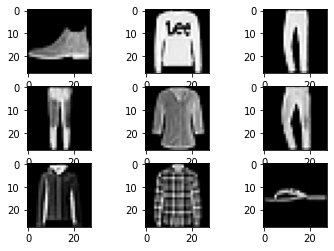

In [10]:
# แสดงว่ามีรูปไหนบ้างที่นำมา Test
for i in range(9):
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(test_images[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

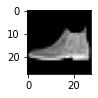

In [11]:
#ให้แสดงรูปที่ 1 ที่นำมาทำการ test ว่าเป็น Class ไหน
pyplot.subplot(330 + 1 + 0)
pyplot.imshow(test_images[0], cmap=pyplot.get_cmap('gray'))
pyplot.show()